In [ ]:
## Questions

## 0.
## Example of grouping by one variable and providing two summaries of the same variable¶

## 1.
# see Summarizing over all rows or all columns (without grouping)

## 2. groupby syntax
# why & when to use .agg()
df1 = df.groupby(["WARD"]).agg(
    {"OFFENSE" : ["unique"]}
).reset_index()

df.groupby("WARD")["OFFENSE"].unique()

## 3. 
# when to use .apply
# when to use np.mean
df[["X","Y"]].apply( np.mean, axis=0 )

df[["X","Y"]].mean()

## 4. lambda functions
# see Example of grouping by two variables

## 5.
plt.bar(a.index, a.values, )

avg_weight_by_bread.plot(kind = "bar", title = "Mean Weight by Dog Breed")
plt.show()

## 6. other functions from datacamp
# indexing & .loc[]

## 6.
# How to review materials (in-class pratices?)
# memorize?



In [59]:
df.groupby("WARD")[["X", "Y"]].mean()
df.groupby("WARD")[["X", "Y"]].std()
df.groupby("WARD")[["X", "Y"]].sem()

,X,Y
WARD,,
1,-77.031256,38.924716
2,-77.038959,38.905941
3,-77.075320,38.941557
4,-77.024905,38.957674
5,-76.989451,38.920249
6,-77.001175,38.893112
7,-76.947402,38.888669
8,-76.988986,38.850526


,X,Y
WARD,,
1,0.007200,0.006417
2,0.014106,0.005360
3,0.013408,0.013887
4,0.011813,0.013923
5,0.014957,0.012766
6,0.011302,0.010021
7,0.018753,0.012504
8,0.012791,0.015775


,X,Y
WARD,,
1,0.000121,0.000108
2,0.000206,0.000078
3,0.000324,0.000336
4,0.000227,0.000268
5,0.000226,0.000193
6,0.000183,0.000162
7,0.000291,0.000194
8,0.000236,0.000291


In [66]:
def square_number_sum(x):
    return (x**2).sum()

square_number(np.array([100]))

10000

In [67]:
df.groupby("WARD").agg(
    {
        "X" : ["mean", "std", "sem", square_number_sum]
    }
)

X                                      
           mean       std       sem square_number_sum
WARD                                                 
1    -77.031256  0.007200  0.000121      2.101757e+07
2    -77.038959  0.014106  0.000206      2.780548e+07
3    -77.075320  0.013408  0.000324      1.015249e+07
4    -77.024905  0.011813  0.000227      1.603646e+07
5    -76.989451  0.014957  0.000226      2.604489e+07
6    -77.001175  0.011302  0.000183      2.261983e+07
7    -76.947402  0.018753  0.000291      2.455991e+07
8    -76.988986  0.012791  0.000236      1.739664e+07

## 0. Load imports 

In [ ]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 0. Load data

In [10]:
## load data on 2020 crimes in DC
df = dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()
dc_crim_2020.shape
dc_crim_2020.info()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.044182,38.905654,11139598,2020/08/24 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1900 - 1999 BLOCK OF M STREET NW,396168.0,137533.0,...,010700 1,10700.0,Precinct 17,38.905646,-77.044180,GOLDEN TRIANGLE,2011/09/23 06:40:00+00,NaN,594430168,NaN
1,-77.023981,38.900345,5370,2020/01/17 02:39:05+00,EVENING,OTHERS,THEFT F/AUTO,800 - 899 BLOCK OF 9TH STREET NW,397920.0,136943.0,...,005802 5,5802.0,Precinct 129,38.900337,-77.023979,DOWNTOWN,2020/01/11 02:48:51+00,2020/01/17 02:48:54+00,594430173,NaN
2,-76.972651,38.857491,10251445,2020/09/11 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2300 - 2399 BLOCK OF AINGER PLACE SE,402374.0,132186.0,...,007502 1,7502.0,Precinct 134,38.857483,-76.972648,NaN,2010/09/02 04:00:00+00,2010/09/02 04:00:00+00,594430178,NaN
3,-76.972226,38.854086,10147537,2020/12/21 05:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,2300 - 2499 BLOCK OF HARTFORD STREET SE,402411.0,131808.0,...,007408 2,7408.0,Precinct 115,38.854078,-76.972223,NaN,2010/10/10 02:00:00+00,NaN,594431372,NaN
4,-77.001753,38.821632,18048023,2020/10/21 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,4600 - 4799 BLOCK OF SOUTH CAPITOL STREET,399848.0,128205.0,...,009811 1,9811.0,Precinct 125,38.821624,-77.001750,NaN,2018/03/26 08:40:06+00,2018/03/26 10:04:44+00,594431711,NaN


(27931, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27931 entries, 0 to 27930
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     27931 non-null  float64
 1   Y                     27931 non-null  float64
 2   CCN                   27931 non-null  int64  
 3   REPORT_DAT            27931 non-null  object 
 4   SHIFT                 27931 non-null  object 
 5   METHOD                27931 non-null  object 
 6   OFFENSE               27931 non-null  object 
 7   BLOCK                 27931 non-null  object 
 8   XBLOCK                27931 non-null  float64
 9   YBLOCK                27931 non-null  float64
 10  WARD                  27931 non-null  int64  
 11  ANC                   27931 non-null  object 
 12  DISTRICT              27902 non-null  float64
 13  PSA                   27896 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  27931 non-null  object 
 15  BLOCK_GROUP        

In [3]:
df.SHIFT.value_counts()

SHIFT
EVENING     12324
DAY         10094
MIDNIGHT     5513
Name: count, dtype: int64

#### Warm-up: Ways to add 100 to column X

In [5]:
%%time
df.X + 100

CPU times: user 273 μs, sys: 107 μs, total: 380 μs
Wall time: 379 μs


0        22.955818
1        22.976019
2        23.027349
3        23.027774
4        22.998247
           ...    
27926    22.951183
27927    22.996471
27928    22.973471
27929    23.006236
27930    22.952276
Name: X, Length: 27931, dtype: float64

In [4]:
new_list = []
for x in df.X:
    new_list.append( x+100 )

new_list

[22.955818168844402,
 22.9760189542681,
 23.027349355854895,
 23.0277743201099,
 22.9982473585021,
 23.006236356817496,
 23.018440538536595,
 22.9760271066923,
 22.921604926950494,
 22.972733319339696,
 23.018080918529293,
 23.006847596660407,
 22.9360797686288,
 22.929227576669007,
 23.0158936656873,
 23.0123848488129,
 22.967811624233704,
 22.992474627238394,
 23.012285667299494,
 22.977563907024603,
 22.971133043227994,
 22.999421281286004,
 22.914698108455994,
 22.968037953868404,
 22.975406449251295,
 22.974929944677996,
 22.982438885761695,
 23.022809626556594,
 23.011831603034494,
 22.975013579256895,
 23.086324741534398,
 23.0164506849316,
 23.007412242356196,
 23.021592374059693,
 23.005634855626894,
 23.048199601281894,
 23.020312053710597,
 22.9983260404194,
 23.005634373402003,
 22.922303067319802,
 22.933047110625296,
 23.050521441364197,
 23.023135088684697,
 22.975406449251295,
 22.924174477124893,
 23.018987758111805,
 22.9673823793825,
 22.980095927853796,
 22.92124084

In [12]:
a = df.OFFENSE.value_counts()
a

OFFENSE
THEFT/OTHER                   10926
THEFT F/AUTO                   8284
MOTOR VEHICLE THEFT            3259
ROBBERY                        1998
ASSAULT W/DANGEROUS WEAPON     1631
BURGLARY                       1444
HOMICIDE                        198
SEX ABUSE                       178
ARSON                            13
Name: count, dtype: int64

<BarContainer object of 9 artists>

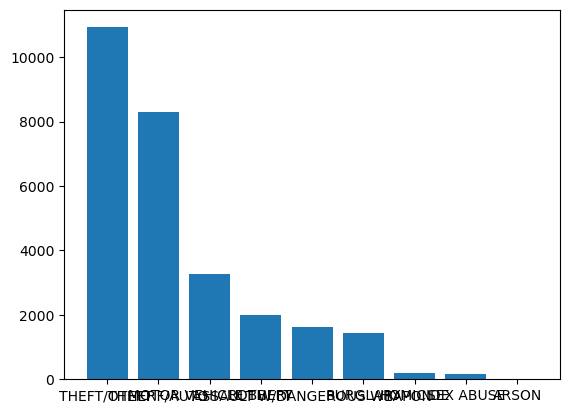

In [13]:
plt.bar(a.index, a.values, )

## 1. Aggregation

In [6]:
## Groupby
for i,ddf in df.groupby("WARD"):
    if i == 2:
        break

ddf.X.mean()

-77.03895868572333

### Example of grouping by one variable and doing one aggregation 

**Task**: find and print the number of unique offense types (`OFFENSE`) by ward (`WARD`)

In [14]:
# 1
df1 = df.groupby(["WARD"]).agg(
    {"OFFENSE" : "unique"}
).reset_index()
df1

# OR df.groupby("WARD")["OFFENSE"].unique()

df1.OFFENSE.apply( len ) # apply a function to every row

# 2
df.groupby("WARD")["OFFENSE"].nunique()

,WARD,OFFENSE
0,1,"[THEFT/OTHER, ASSAULT W/DANGEROUS WEAPON, ROBB..."
1,2,"[HOMICIDE, THEFT F/AUTO, THEFT/OTHER, MOTOR VE..."
2,3,"[THEFT F/AUTO, THEFT/OTHER, MOTOR VEHICLE THEF..."
3,4,"[THEFT F/AUTO, THEFT/OTHER, HOMICIDE, MOTOR VE..."
4,5,"[THEFT/OTHER, THEFT F/AUTO, MOTOR VEHICLE THEF..."
5,6,"[ROBBERY, THEFT/OTHER, THEFT F/AUTO, MOTOR VEH..."
6,7,"[THEFT F/AUTO, ROBBERY, ASSAULT W/DANGEROUS WE..."
7,8,"[HOMICIDE, THEFT/OTHER, THEFT F/AUTO, MOTOR VE..."


0    9
1    9
2    8
3    8
4    9
5    9
6    9
7    9
Name: OFFENSE, dtype: int64

WARD
1    9
2    9
3    8
4    8
5    9
6    9
7    9
8    9
Name: OFFENSE, dtype: int64

### Example of grouping by one variable and providing two summaries of the same variable

**Task**: previous showed number of offenses by ward but want to find out content of offenses in each ward; create an aggregation that summarizes both the number of unique offenses by ward and what those offenses are -- for instance, by pasting the unique offenses in that ward separated by the ";" (e.g., Theft; Burglary;...)

*Hint*: you can use the join command to paste together a list separated by some delimiter. 
    - The syntax, if we are using the comma delimiter, is: ", ".join(nameoflist)

In [8]:
", ".join(["a", "b", "c"])

'a, b, c'

In [9]:
#df1 = df.groupby("WARD").agg(
#    count = {"OFFENSE" : "unique"}
#).reset_index()

df1 = df.groupby("WARD")["OFFENSE"].unique()
df1

# df2 = df.groupby("WARD")["OFFENSE"].nunique()
# df2

for x in df1.OFFENSE:
    ", ".join

def get_unique_offenses(x):
    y = x.unique()
    return ", ".join(y)
    
df.groupby("WARD")["OFFENSE"].agg(get_unique_offenses)

offenses_summary = df.groupby("WARD").agg(
    {
        "OFFENSE" : 


SyntaxError: incomplete input (2900338697.py, line 21)

In [38]:
def add_10(x):
    return x + 10
df1

,WARD,OFFENSE
0,1,"[THEFT/OTHER, ASSAULT W/DANGEROUS WEAPON, ROBB..."
1,2,"[HOMICIDE, THEFT F/AUTO, THEFT/OTHER, MOTOR VE..."
2,3,"[THEFT F/AUTO, THEFT/OTHER, MOTOR VEHICLE THEF..."
3,4,"[THEFT F/AUTO, THEFT/OTHER, HOMICIDE, MOTOR VE..."
4,5,"[THEFT/OTHER, THEFT F/AUTO, MOTOR VEHICLE THEF..."
5,6,"[ROBBERY, THEFT/OTHER, THEFT F/AUTO, MOTOR VEH..."
6,7,"[THEFT F/AUTO, ROBBERY, ASSAULT W/DANGEROUS WE..."
7,8,"[HOMICIDE, THEFT/OTHER, THEFT F/AUTO, MOTOR VE..."


In [52]:
# df.Y.apply(add_10)

df1 = df.groupby("WARD")["OFFENSE"].unique().reset_index()

def join_text(x):
    return "; ".join(x)

df1["stringed_offense"] = df1.OFFENSE.apply(join_text)
df1["counts"] = df1.OFFENSE.apply()

df1

# x = df1.OFFENSE.iloc[0]
# ", ".join(x)

AttributeError: 'Series' object has no attribute 'length'

In [42]:
## Solution
df1 = df.groupby("WARD")["OFFENSE"].unique()

def count_fx(x):
    return len(x)

def join_text(x):
    return "; ".join(x)

new_list = []
for i, l in list( df1.items() ):
    new_list.append( join_text(l))
    
df1.apply(count_fx)
df2 = df1.reset_index()
df2["uniq_off_by_ward"] = new_list
df2

WARD
1    9
2    9
3    8
4    8
5    9
6    9
7    9
8    9
Name: OFFENSE, dtype: int64

,WARD,OFFENSE,uniq_off_by_ward
0,1,"[THEFT/OTHER, ASSAULT W/DANGEROUS WEAPON, ROBB...",THEFT/OTHER; ASSAULT W/DANGEROUS WEAPON; ROBBE...
1,2,"[HOMICIDE, THEFT F/AUTO, THEFT/OTHER, MOTOR VE...",HOMICIDE; THEFT F/AUTO; THEFT/OTHER; MOTOR VEH...
2,3,"[THEFT F/AUTO, THEFT/OTHER, MOTOR VEHICLE THEF...",THEFT F/AUTO; THEFT/OTHER; MOTOR VEHICLE THEFT...
3,4,"[THEFT F/AUTO, THEFT/OTHER, HOMICIDE, MOTOR VE...",THEFT F/AUTO; THEFT/OTHER; HOMICIDE; MOTOR VEH...
4,5,"[THEFT/OTHER, THEFT F/AUTO, MOTOR VEHICLE THEF...",THEFT/OTHER; THEFT F/AUTO; MOTOR VEHICLE THEFT...
5,6,"[ROBBERY, THEFT/OTHER, THEFT F/AUTO, MOTOR VEH...",ROBBERY; THEFT/OTHER; THEFT F/AUTO; MOTOR VEHI...
6,7,"[THEFT F/AUTO, ROBBERY, ASSAULT W/DANGEROUS WE...",THEFT F/AUTO; ROBBERY; ASSAULT W/DANGEROUS WEA...
7,8,"[HOMICIDE, THEFT/OTHER, THEFT F/AUTO, MOTOR VE...",HOMICIDE; THEFT/OTHER; THEFT F/AUTO; MOTOR VEH...


In [ ]:
df1 = df.groupby("WARD")["OFFENSE"].unique()
df1 = df1.reset_index()
df1["nuniques"] = df1.OFFENSE.apply(len)
df1["uniq_off_by_ward"] = df1.OFFENSE.apply(join_text)

df1[["WARD", "nuniques", "uniq_off_by_ward"]]

In [ ]:
def get_uniq_offenses(X):
    uniq_offs = sorted( X.unique() )
    uniq_offs = "; ".join( uniq_offs )
    return uniq_offs

A = uniq_off_valcount_byward = df.groupby("WARD").agg(
        {"OFFENSE": ["nunique", get_uniq_offenses]}
        )
A

### Example of grouping by two variables 

**Task**: group by ward (`WARD`) and police shift (`SHIFT`) and find the offense that is most common in that ward and shift

In [27]:
# 1
df.groupby(["WARD", "SHIFT"]).agg(
    {"OFFENSE" : "max"}
).reset_index()

# 2 ***
# lambda
df.groupby(["WARD", "SHIFT"]).agg(
    {
        "OFFENSE": lambda x: x.mode()
    }
).reset_index()

# why this doesn't work?
# df.groupby(["WARD", "SHIFT"]).agg(
#     {"OFFENSE" : "mode"}
# ).reset_index()

,WARD,SHIFT,OFFENSE
0,1,DAY,THEFT/OTHER
1,1,EVENING,THEFT/OTHER
2,1,MIDNIGHT,THEFT/OTHER
3,2,DAY,THEFT/OTHER
4,2,EVENING,THEFT/OTHER
5,2,MIDNIGHT,THEFT/OTHER
6,3,DAY,THEFT/OTHER
7,3,EVENING,THEFT/OTHER
8,3,MIDNIGHT,THEFT/OTHER
9,4,DAY,THEFT/OTHER


,WARD,SHIFT,OFFENSE
0,1,DAY,THEFT/OTHER
1,1,EVENING,THEFT/OTHER
2,1,MIDNIGHT,THEFT/OTHER
3,2,DAY,THEFT/OTHER
4,2,EVENING,THEFT/OTHER
5,2,MIDNIGHT,THEFT/OTHER
6,3,DAY,THEFT/OTHER
7,3,EVENING,THEFT/OTHER
8,3,MIDNIGHT,THEFT/OTHER
9,4,DAY,THEFT F/AUTO


In [23]:
def add_100(x):
    return x+100
add_100(200)

300

In [25]:
add_100_lmbd = lambda x: x+100

## Summarizing over all rows or all columns (without grouping)

We can also use the `apply` function to summarize rows or columns efficiently

**Task**: find the mean lat and longitude in one line of code

In [ ]:
df[["X","Y"]].apply( np.mean, axis=0 )

df[["X","Y"]].mean()

In [28]:
A = pd.DataFrame(np.array([[True, True, False],
                 [True, True, False]]).T, columns = ["x","y"])
(~A.x)

0    False
1    False
2     True
Name: x, dtype: bool

## 2. Creating new columns/transforming their type 

### Simple filtering

`np.where` is in the numpy package (aliased as `np`) and operates similar to `ifelse` in R

But there is a built in pandas way to emulate this.

**Task**: create an indicator `is_theft` for any offense that contains the word "THEFT"
    
**Task**: create an indicator `is_theft_notmotor` for any offense that contains the word "THEFT" but does not contain the word "MOTOR"

In [ ]:
(df.X < -77).mean() # percentage that is true

In [ ]:
is_theft = df.OFFENSE.str.contains("THEFT")
is_theft_notmotor = (df.OFFENSE.str.contains("THEFT")) & ~(df.OFFENSE.str.contains("MOTOR"))

print(df[is_theft])

In [ ]:
np.where(df.OFFENSE.str.contains("THEFT"), True, False)

### np.select

**Task**: create a new variable, `offense_summary`, where you:
        
- Recode theft offenses that use a gun or knife as the method (`METHOD`) as: violent theft
- Recode non-theft offenses that use a gun or knife as the method as: violent other
- Recode all other as non-violent 

In [ ]:
cats = ["violent theft", "violent other"]

conditions = [
    (df.METHOD.isin(["GUN", "KNIFE"])) & is_theft,
    (df.METHOD.isin(["GUN", "KNIFE"])) & ~is_theft
]
                    
df["offense_summary"] = np.select(conditions, cats, default = "non-violent")

print(df)

df.SHIFT.unique()

### map.recode

**Task**: recode shifts that are MIDNIGHT or EVENING as "nighttime"; code other shift to daytime

In [ ]:
df["SHIFT"]

In [ ]:
shift = ["MIDNIGHT", "EVENING","DAY"]

time = ["nighttime", "nighttime", "daytime"]

conversion_dict = dict(zip(shift, time))

df["New_SHIFT"] = df.SHIFT.map(conversion_dict)

print(df)

# use lambda
conversion_dict.get("MIDNIGHT", "oops")
df.SHIFT.apply(lambda x: conversion_dict[x[)

In [ ]:
# use np.where as ifelse
df.SHIFT = np.where(df["SHIFT"].str.contains("MIDNIGHT") | df["SHIFT"].str.contains("EVENING"), "nighttime", "daytime")

### Using built-in pandas methods

Another way of creating variables, used either alone or in combination with np.where and np.select is to use pandas built in `str` methods

Basic structure is: `df['namestringcol'].str.someoperation`

**Task**: using a `str` method, create a new variable--`OFFENSE_NOSP`--that replaces spaces in the `OFFENSE` column with underscores

In [ ]:
df["OFFENSE_NOSP"] = df.OFFENSE.str.replace(" ", "_")
print(df)

### Transforming column types

**Task**: check the type of the `START_DATE` column

In [ ]:
df["START_DATE"].dtype

# O --> Object

df.START_DATE.iloc[0]

# string columns will often show up as object columns

**Task**: recast the `START_DATE` column to datetime, calling this `START_DATE_CLEAN`; coerce errors rather than cleaning the string; check the type of that new col

In [ ]:
df["START_DATE_CLEAN"] = pd.to_datetime(df["START_DATE"], errors = "coerce")

# For errors: Ignore / throw and error / coerce to NaN

df["START_DATE_CLEAN"].dtype

df

**Task:** print the min and max of `START_DATE_CLEAN`. What happens if you try to do this with `START_DATE`?

In [ ]:
print(df.START_DATE_CLEAN.max())
print(df.START_DATE_CLEAN.min())
print(df.START_DATE.max())
print(df.START_DATE.min())

## 3. Row and column filtering 

### Row subsetting

**Task**: filter to crime reports about theft using the `is_theft` definition and that are in ward 3

In [ ]:
df[is_theft & (df.WARD == 3)]
# df[is_theft & (df.WARD == 3)]["WARD"]

### Column subsetting


**Task**: select two columns--`START_DATE` and `END_DATE`--and print the head of the dataframe

In [ ]:
df[["START_DATE", "END_DATE"]].head()

**Task**: use list comprehension to automate this a bit and select all columns with the word "DATE" in the name; print the head of the dataframe

In [ ]:
courses = ["QSS45", "QSS20", "CS01", "WRIT5"]

new_list = []
for c in courses:
    if "QSS" in c:
        new_list.append(c)

new_list

# List comprehension
[c for c in courses if "QSS" in c]


In [ ]:
df[[col for col in df.columns if "DATE" in col]].head()

**Task**: filter reports of crime in `START_DATE_CLEAN` before May 2020 and that are located in ward 1; select the ward and `START_DATE` column and print a random sample of rows

In [ ]:
filtered = df[ (df.START_DATE_CLEAN < "2020-05-01") & (df.WARD == 1) ]
filtered[["WARD", "START_DATE"]].sample(n = 5)